#EMAp-FGV
##Trabalho de Simulação Computacional  
###Professor: Hugo de la Cruz  
###Aluno: Marcio Maciel Bastos

In [23]:
import numpy as np
from numpy.linalg import inv
import collections
import matplotlib.pyplot as plt
import math
from pylab import linspace,pi,exp,real,imag,axis
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline


##1. Considere a equação diferencial

$ \dot{x}(t) = \left( \begin{array}{cc}
-100 & 1 \\
 0 & -\frac{1}{10} \end{array} \right)x(t)$

#### (a) Implemente uma função em Python que construa uma aproximação da solução usando o método de Euler explícito (Forward Euler). Considere como parâmetros de entradas o tamanho de paso h, o intervalo de integração e as condições iniciais.

Forward de Euler:  
$y_{n+1} = y_{n} + hf(y_{n},t_{n})$

In [24]:
def setA(M):
    return M[:, 0]+M[:, 1]


In [25]:
def euler_forward(intervalo, h):
    X = dict(np.array([]))
    A = np.array([[-100, 1], [0, -1/float(10)]])
    X[intervalo[0]] = np.array([0,1])
    N = int((intervalo[1]-intervalo[0])/h)
    key = round(intervalo[0], 1)
    for i in range(1,int(N)+1):
        x = X[key]
        Ar = A*x
        key += h
        key = round(key, 1)
        X[key] = x + h*(setA(Ar))
    return collections.OrderedDict(sorted(X.items()))


####(b) Teste seu programa para diferentes valores de $h$ (para valores $h > \frac{1}{50}$ e valores $h < \frac{1}{50}$) e compare com a solução exata do sistema (para obter a solução exata, note que a matriz da $EDO$ pode-se diagonalizar. Explique os resultados computacionais obtidos, com base em seus conhecimentos de estabilidade absoluta (A-stability) para o método de Euler.

Fazendo $x(t) = \left( \begin{array}{c}
    x_{1}(t) \\
    x_{2}(t)\end{array} \right)$ 

In [26]:
def set_(interv, b):
    h = np.array([])
    X1 = np.array([])
    X2 = np.array([])
    for i in interv:
        if(b is False):
            X = euler_forward([0.0, 2.0], 1/float(i))
        elif(b is True):
            X = euler_backward([0.0, 2.0], 1/float(i))
        X1 = np.append(X1, X[max(X.keys())][0])
        X2 = np.append(X2, X[max(X.keys())][1])
        h = np.append(h, 1/float(i))
    return h, X1, X2


In [27]:
def plot(h, X1, X2):
    plt.figure(1)
    plt.plot(h, X1)
    plt.xlabel('valor do h')
    plt.gca().invert_xaxis()
    plt.ylabel('valor do X1')
    plt.title(u'Gráfico do X1')
    plt.figure(2)
    plt.plot(h, X2)
    plt.xlabel('valor do h')
    plt.gca().invert_xaxis()
    plt.ylabel('valor do X2')
    plt.title(u'Gráfico do X2')
    plt.show()
    

In [28]:
def printer(h, X1, X2, inter):
    print "  h  |     X1     |     X2     "  
    for i in range(inter):
        print str(round(h[i],4))+" | "+ str(round(X1[i],4))+" | "+str(round(X2[i],4))
        

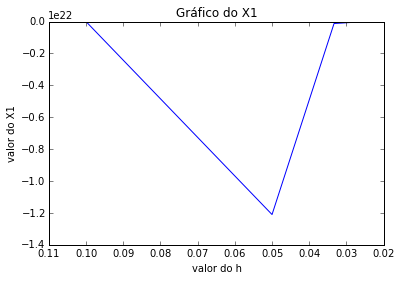

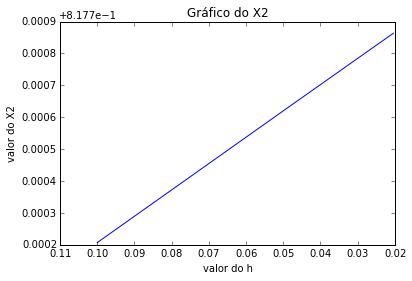

  h  |     X1     |     X2     
0.1 | -1.21698352944e+17 | 0.8179
0.05 | -1.21013595557e+22 | 0.8183
0.0333 | -1.19961428709e+20 | 0.8185
0.025 | -1.22386985041e+12 | 0.8185
0.0204 | -0.4966 | 0.8186


In [29]:
h, X1, X2 = set_([10,20,30,40,49], False)
plot(h, X1, X2)
printer(h, X1, X2, len([10,20,30,40,49]))


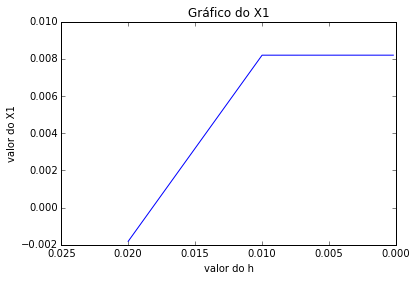

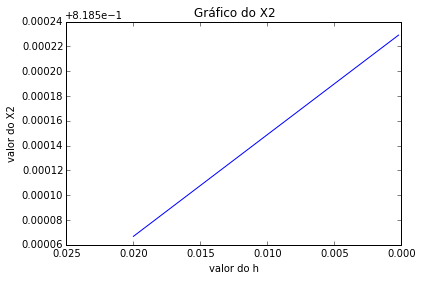

  h  |     X1     |     X2     
0.02 | -0.0018 | 0.8186
0.01 | 0.0082 | 0.8186
0.002 | 0.0082 | 0.8187
0.001 | 0.0082 | 0.8187
0.0002 | 0.0082 | 0.8187


In [30]:
intervalo = [50,100,500,1000,5000]
h, X1, X2 = set_(intervalo, False)
plot(h, X1, X2)
printer(h, X1, X2, len(intervalo))


$ \dot{x}(t) = \left( \begin{array}{cc}
-100 & 1 \\
 0 & -\frac{1}{10} \end{array} \right)x(t)$  
    
$x(0) = \left( \begin{array}{c}
    0 \\
    1\end{array} \right)$  

$\left| \begin{array}{cc}
-100 -\lambda & 1 \\
     0 & -\frac{1}{10} -\lambda \end{array} \right| =$  
  
$(-100 -\lambda)(-\frac{1}{10} -\lambda) = 0$

$\lambda^{2} + (100+\frac{1}{10})\lambda +10$

$\Delta = 9980.01 \\
\lambda_{1} = -0.1 \\
\lambda_{2} = -100
$

1. $\lambda = \lambda_1 \\
\left( \begin{array}{cc}
-100 +0.1 & 1 \\
     0 & -\frac{1}{10} +0.1 \end{array} \right)\left( \begin{array}{c}
    \xi_1 \\
    \xi_2\end{array} \right)\implies \xi^{(1)}= \left( \begin{array}{c}
    1 \\
    99.9\end{array} \right) \\
$
2. $\lambda = \lambda_2 \\
\left( \begin{array}{cc}
-100 +100 & 1 \\
     0 & -\frac{1}{10} +100 \end{array} \right)\left( \begin{array}{c}
    \xi_1 \\
    \xi_2\end{array} \right)\implies \xi^{(2)}= \left( \begin{array}{c}
    1 \\
    0\end{array} \right) \\
$

No intervalo $[0,2]$, $W \neq 0$

$x(t) = C_{1} \left( \begin{array}{c}
    1 \\
    99.9\end{array} \right)e^{-0.1t} + C_{2} \left( \begin{array}{c}
    1 \\
    0\end{array} \right)e^{-100t} $

$x(0) = C_{1} \left( \begin{array}{c}
    1 \\
    99.9\end{array} \right) + C_{2} \left( \begin{array}{c}
    1 \\
    0\end{array} \right) = \left( \begin{array}{c}
    0 \\
    1\end{array} \right) \implies C_{1} = -C_{2}$  
$C_{2} = \frac{1}{99.9}$

$x(2) =  +\frac{1}{99.9}\left( \begin{array}{c}
    1 \\
    99.9\end{array} \right)e^{-0.2} - \frac{1}{99.9} \left( \begin{array}{c}
    1 \\
    0\end{array} \right)e^{-200} \approx \left( \begin{array}{c}
    0.0082 \\
    0.8187\end{array} \right)$

Pelo problema exposto e pelo método de Euler temos:

$ A = \left( \begin{array}{cc}
-100 & 1 \\
 0 & -\frac{1}{10} \end{array} \right)$

$\dot{x}=Ax$, como $A$ é diagonalizável, podemos fazer $A = V\Lambda V^{-1}$ e introduzir $y(t) = V^{-1}x(t)$:

$V^{-1}x(t) = V^{-1}Ax = V^{-1}AVV^{-1}x = \Lambda V^{-1}x$ 

e portanto:

$\dot{y}(t)=\Lambda y(t)$ e assim: 

$\dot{y}_{i}(t)=\Lambda_{i} y_{i}(t)$

$\Lambda = \left( \begin{array}{cc}
-100 & 0 \\
 0 & -\frac{1}{10} \end{array} \right)$

e finalmente:

$y_{n+1} = V\left( \begin{array}{cc}
(1-100h) & 0 \\
 0 & (1-\frac{1}{10}h) \end{array} \right)V^{-1}y_{n} = V\left( \begin{array}{cc}
(1-100h)^{n} & 0 \\
 0 & (1-\frac{1}{10}h)^{n} \end{array} \right)V^{-1}y_{0}$

Temos que a sua região de A-estabilidade $S = \{\lambda h \in \mathbb{C}: |R(\lambda h)| < 1$

portanto $|1-100h|<1$ e $|(1-\frac{1}{10}h)|<1$ e assim:

$h<\frac{2}{100} = \frac{1}{50}$

Pudemos constatar que para convergir para a solução de forma estável devemos escolher $h< \frac{1}{50}$, como pode ser verificado experimentalmente, isso se deve ao fato de a àrea de A-estabilidade estar no círculo do plano imaginário tal que $h<\frac{1}{50}$

In [31]:
r=exp(1j*linspace(0,2*pi,10000))


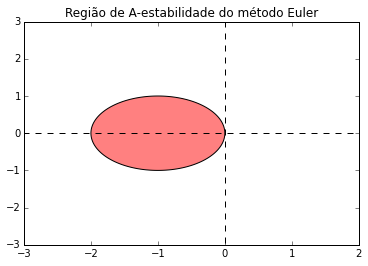

In [32]:
Path=mpath.Path
fig = plt.figure()
for name,z in zip(['Euler'],[r-1]):
    fig.clf()
    ax=fig.add_subplot(111)

    verts=map(lambda z:(real(z),imag(z)), z)

    codes=[Path.MOVETO]+[Path.LINETO]*(len(verts)-2)+[Path.CLOSEPOLY]

    path=mpath.Path(verts,codes)
    patch=mpatches.PathPatch(path,facecolor=[1, 0.5, 0.5],edgecolor='black',alpha=1)
    ax.add_patch(patch)
    ax.plot([-6,4],[0,0],'--',color='black')
    ax.plot([0,0],[-6,6],'--',color='black')
    plt.title(u'Região de A-estabilidade do método Euler')
    ax.set_xlim(-3,2)
    ax.set_ylim(-3,3)
    

####(c) Implemente o método de Euler implícito (Backward Euler) para este sistema e compare com os resultados obtidos com o Euler explicito (Forward Euler). Explique porque o desempenho do Backward Euler é melhor.

In [33]:
def euler_backward(intervalo, h):
    X = dict(np.array([]))
    A = np.array([[-100, 1], [0, -1/float(10)]])
    X[intervalo[0]] = np.array([0, 1])
    N = int((intervalo[1]-intervalo[0])/h)
    I = np.identity(2)
    IA = inv(I-h*A)
    key = round(intervalo[0], 1)
    for i in range(1,int(N)+1):
        x = X[key]
        Ar = setA(IA*x)
        key += h
        key = round(key, 1)
        X[key] = Ar
    return collections.OrderedDict(sorted(X.items()))


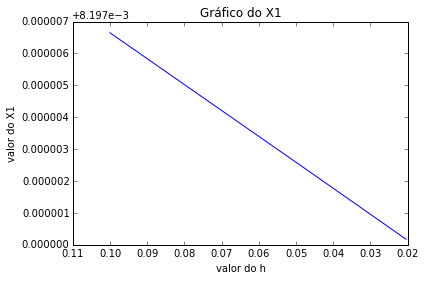

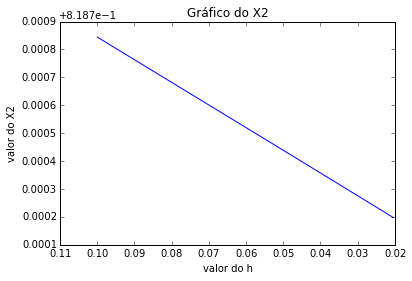

  h  |     X1     |     X2     
0.1 | 0.0082 | 0.8195
0.05 | 0.0082 | 0.8191
0.0333 | 0.0082 | 0.819
0.025 | 0.0082 | 0.8189
0.0204 | 0.0082 | 0.8189


In [34]:
h, X1, X2 = set_([10,20,30,40,49], True)
plot(h, X1, X2)
printer(h, X1, X2, len([10,20,30,40,49]))


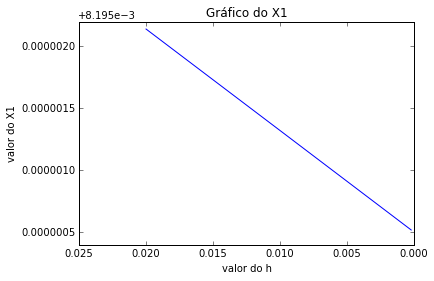

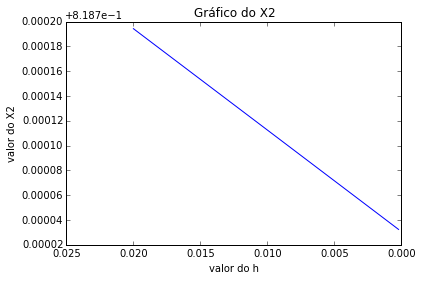

  h  |     X1     |     X2     
0.02 | 0.0082 | 0.8189
0.01 | 0.0082 | 0.8188
0.002 | 0.0082 | 0.8187
0.001 | 0.0082 | 0.8187
0.0002 | 0.0082 | 0.8187


In [35]:
intervalo = [50,100,500,1000,5000]
h, X1, X2 = set_(intervalo, True)
plot(h, X1, X2)
printer(h, X1, X2, len(intervalo))


Verificamos que a velocidade de convergência do backward é maior, isso é explicado porque em uma interação só usamos o elemento corrente, diferentemente do método forward, que utilizamos o elemento anterior.

##2. Considerando o método do Trapézio:

####(a) Prove que o método é convergente. 

Regra do trapézio:  
$y_{n+1}=y_{n} + \frac{h}{2}[f(t_{n},y_{n})+f(t_{n+1},y_{n+1})]$  
  
$y_{n+1}=y_{n} + \frac{h}{2}[\lambda y_{n}+\lambda y_{n+1}]$  
  
$(1-\frac{h\lambda}{2})y_{n+1}=(1+\frac{h\lambda}{2})y_{n}$  
  
$y_{n+1}=\frac{(1+\frac{h\lambda}{2})}{(1-\frac{h\lambda}{2})}y_{n} \implies y_{n+1}=\frac{(2+h\lambda)}{(2-h\lambda)}y_{n}$  
  
Para ser convergente:  
  
$\Big|\frac{(2+h\lambda)}{(2-h\lambda)}y_{n}\Big|<1$, de forma que:  
  
$y_{n+1}=\Big(\frac{(2+h\lambda)}{(2-h\lambda)}\Big)^{n}y_{0}$, converge para zero $(0)$ quando $n\rightarrow \infty$ para qualquer $h$, tal que $\Re(h\lambda)<0$ 

####(b) Compare a região de A-estabilidade de este método com aquela do método de Heun (Trapézio explícito).

Região de A-estabilidade do Trapezoidal de acordo com o ítem (a):  

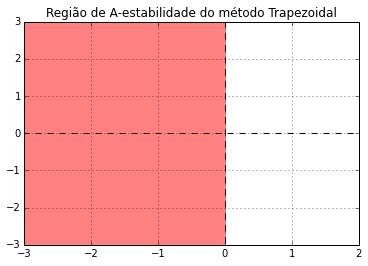

In [36]:
Path=mpath.Path
fig = plt.figure()
i = 1
for name,z in zip(['trapezoidal'], [[5j,-5+5j,-5-5j,-5j,5j]]):
    fig.clf()
    ax=fig.add_subplot(111)
    verts=map(lambda z:(real(z),imag(z)), z)

    codes=[Path.MOVETO]+[Path.LINETO]*(len(verts)-2)+[Path.CLOSEPOLY]

    path=mpath.Path(verts,codes)
    patch=mpatches.PathPatch(path,facecolor=[1, 0.5, 0.5], edgecolor=[1, 0.5, 0.5],alpha=1)
    ax.add_patch(patch)
    ax.plot([-6,4],[0,0],'--',color='black')  
    ax.plot([0,0],[-6,6],'--',color='black')
    ax.set_xlim(-3,2)
    ax.set_ylim(-3,3)
    plt.title(u'Região de A-estabilidade do método Trapezoidal')
plt.grid()


Região de A-estabilidade do método Heun:  
  
$y_{n+1}=y_{n} + \frac{h}{2}[f(t_{n},y_{n})+f(t_{n+1},\tilde{y}_{n+1})]$  
$\tilde{y}_{n+1} = y_n + hf(t,y)$  
  
$y_{n+1}=y_{n} + \frac{h}{2}[\lambda y_{n}+\lambda y_{n}+(h\lambda)^{2} y_{n}]$  
  
$y_{n+1}=\Big[1 + h\lambda +\frac{(h\lambda)^{2}}{2}\Big] y_{n}$

Resolvendo
$1 + h\lambda +\frac{(h\lambda)^{2}}{2} = e^{i\theta}$:

In [37]:
R = np.array([])
for i in range(len(r)):
    k = np.roots([0.5,1,(1-r[i])])
    R = np.append(R,k)
    

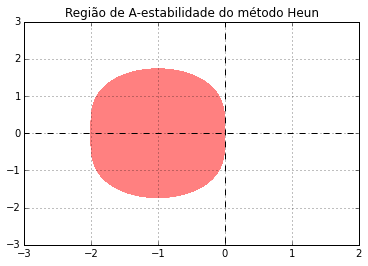

In [38]:
Path=mpath.Path
fig = plt.figure()
for name,z in zip(['Heun'],[R]):
    fig.clf()
    ax=fig.add_subplot(111)

    verts=map(lambda z:(real(z),imag(z)), z)

    codes=[Path.MOVETO]+[Path.LINETO]*(len(verts)-2)+[Path.CLOSEPOLY]

    path=mpath.Path(verts,codes)
    patch=mpatches.PathPatch(path,facecolor=[1, 0.5, 0.5], edgecolor=[1, 0.5, 0.5],alpha=1)
    ax.add_patch(patch)
    ax.plot([-6,4],[0,0],'--',color='black')  
    ax.plot([0,0],[-6,6],'--',color='black')
    ax.set_xlim(-3,2)
    ax.set_ylim(-3,3)
    plt.title(u'Região de A-estabilidade do método Heun')
plt.grid()


Verifica-se que a região de A-estabilidade do método do Trapézio é infinitamente menor que a do método de Heun, uma vez que a região de A-estabilidade do método do Trapézio é todo o hemispaço do plano dos complexos tal que a $\Re(h\lambda)<0$ 

####(c) Considere a equação diferencial :
####$\dot{x}(t) = -10x(t)$  
####$x(0) = 2$
####É possivel com um passo de tamanho $h = \frac{1}{10}$ capturar a dinâmica da solução exata da equação usando o método de Heun? Explique.


Para convergir:  
  
$\Big|1 + h\lambda +\frac{(h\lambda)^{2}}{2}\Big|<1$  
  
Caso $(i)$: 
  
$1 + h\lambda +\frac{(h\lambda)^{2}}{2} - 1 < 0$  
  
$h\lambda < -2$ 
  
Caso $(ii)$:  
  
$-1 - h\lambda -\frac{(h\lambda)^{2}}{2} - 1 < 0$  
  
$\Delta = -12$  
  
Qualquer valor é válido.  
  
Portanto a intersecção nos dá que:  
  
$h\lambda < -2 \implies h <\frac{-2}{\lambda}$   
  
Do enunciado:  
  
$h <\frac{-2}{-10} = \frac{1}{5}$, 
  
Como $\frac{1}{10} < \frac{1}{5}$, podemos concluir que sim, podemos capturar a dinâmica exata da equação, pois o valor de $h$ está dentro da região de A-estabilidade.

##3. Determine a região de estabilidade absoluta (A-estabilidade) do método de Runge Kutta de ordem 4 (RK4):

Região de A-estabilidade do método RK4:  
  
$Y_{1} = y_{n}$  
  
$Y_{2} = y_{n} + \frac{h}{2}f(Y_{1})$  
  
$Y_{3} = y_{n} + \frac{h}{2}f(Y_{2})$  
  
$Y_{4} = y_{n} + hf(Y_{3})$  
  
$y_{n+1} = y_{n} + h(\frac{1}{6}f(Y_{1})+\frac{1}{3}f(Y_{2})+\frac{1}{3}f(Y_{3})+\frac{1}{6}f(Y_{4}))$   
  
Substituindo e fazendo $\mu = h\lambda$:    
  
$y_{n+1} = (1+\mu+\frac{1}{2}\mu^2+\frac{1}{6}\mu^3+\frac{1}{24}\mu^4)y_{n}$  
  
de onde tiramos que é a região de estabilidade é definida por:  
  
$1+\mu+\frac{1}{2}\mu^2+\frac{1}{6}\mu^3+\frac{1}{24}\mu^4 = e^{i\theta}$

In [39]:
R = np.array([])
for i in range(len(r)):
    k = np.roots([(1/float(24)),(1/float(6)),0.5,1,(1-r[i])])
    R = np.append(R,k)
M = np.array([])
for i in range(len(r)):
    k = np.roots([0.5,1,(1-r[i])])
    M = np.append(M,k)
N = np.array([])
for i in range(len(r)):
    k = np.roots([0.5,1,(1-r[i])])
    N = np.append(N,k)
    

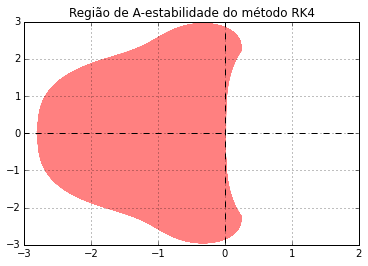

In [40]:
Path=mpath.Path
fig = plt.figure()
for name,z in zip(['RK4'],[R]):
    fig.clf()
    ax=fig.add_subplot(111)

    verts=map(lambda z:(real(z),imag(z)), z)

    codes=[Path.MOVETO]+[Path.LINETO]*(len(verts)-2)+[Path.CLOSEPOLY]

    path=mpath.Path(verts,codes)
    patch=mpatches.PathPatch(path,facecolor=[1, 0.5, 0.5], edgecolor=[1, 0.5, 0.5],alpha=1)
    ax.add_patch(patch)
    ax.plot(1.2*N.real,1.2*N.imag, color=[1, 0.5, 0.5])
    ax.plot(M.real+2.0355,1.7*M.imag, color=[1, 1, 1])
    ax.plot([-6,4],[0,0],'--',color='black')  
    ax.plot([0,0],[-6,6],'--',color='black')
    ax.set_xlim(-3,2)
    ax.set_ylim(-3,3)
    plt.title(u'Região de A-estabilidade do método RK4')
plt.grid()


####(a) Compare a região de estabilidade do método acima e do Euler implícito.


Euler implícito:  
$y_{n+1} = y_{n}+hf(t_{n+1},y_{n+1})$  
  
$y_{n+1} = y_{n}+h\lambda y_{n+1}$  
  
$(1-h\lambda)y_{n+1}=y_{n}$  
  
$y_{n+1}=(1-h\lambda)^{-1}y_{n}$  
  
de onde tiramos que é a região de estabilidade é definida por:

$e^{i\theta} = (1-h\lambda)^{-1}$

In [41]:
R = np.array([])
for i in range(len(r)):
    k = np.roots([-r[i],(r[i]-1)])
    R = np.append(R,k)
    

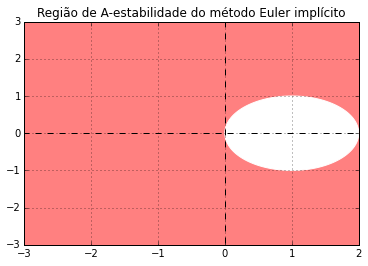

In [42]:
Path=mpath.Path
fig = plt.figure()
for name,z in zip(['Euler implícito'],[R]):
    fig.clf()
    ax=fig.add_subplot(111, axisbg=[1, 0.5, 0.5])

    verts=map(lambda z:(real(z),imag(z)), z)

    codes=[Path.MOVETO]+[Path.LINETO]*(len(verts)-2)+[Path.CLOSEPOLY]

    path=mpath.Path(verts,codes)
    patch=mpatches.PathPatch(path,facecolor=[1, 1, 1], edgecolor=[1, 1, 1],alpha=1)
    ax.add_patch(patch)
    ax.plot([-6,4],[0,0],'--',color='black')  
    ax.plot([0,0],[-6,6],'--',color='black')
    ax.set_xlim(-3,2)
    ax.set_ylim(-3,3)
    plt.title(u'Região de A-estabilidade do método Euler implícito')
plt.grid()


A região de estabilidade para o método Euler implícito é infinitamente maior que a do método RK4, uma vez que a região de estabilidade do método Euler implícito é todo o plano menos o círculo centrado em (1,0) com raio 1.

####(b) Descreva como você programaria (em pseudo-código, ou pode escrever o codigo em Python) o método RK4. (use adequadamente a estructura especial do método)

Início  
 $\Big|$  Função $f^{*}(X,Y) = <>$  
 $\Big|$ Ler $X_0, Y_0$ (Cond. Iniciais)  
 $\Big|$  Ler $X_n$ (Abscissa do ponto desejado)  
 $\Big|$  Ler $N$ (Número de intervalos)  
 $\Big|$  $H\leftarrow \frac{(X_{n}-X_{0})}{N}$  
 $\Big|$  $X \leftarrow X_{0};$  $Y \leftarrow Y_{0};$  
 $\Big|$ Para $I$ de $0$ até $N-1$ executar:  
 $\Big|$ $\Big|$ $K_1 \leftarrow H*f^{*}(X,Y)$  
 $\Big|$ $\Big|$ $K_2 \leftarrow H*f^{*}(X+\frac{H}{2},Y+\frac{K_1}{2})$  
 $\Big|$ $\Big|$ $K_3 \leftarrow H*f^{*}(X+\frac{H}{2},Y+\frac{K_2}{2})$  
 $\Big|$ $\Big|$ $K_3 \leftarrow H*f^{*}(X+H,Y+K_3)$  
 $\Big|$ $\Big|$ $Y\leftarrow Y + \frac{(K_1+2*(K_2+K_3)+K_4)}{6}$  
 $\Big|$ Fim($I$)  
 $\Big|$ Escrever $X_n,Y$  
 Fim

##4. Considere a equação diferencial

$\dot{x}=t^{2}x+x(1-x)$  
$x(0)=1$

####(a) Construa os métodos de Taylor até ordem 3.

Série de Taylor:  
$y(t+\Delta t)=y(t)+\Delta ty'(t)+\frac{1}{2!}\Delta t^{2}y''(t)+\frac{1}{3!}\Delta t^{3}y'''(t)+...$  

Considere: $\frac{dy}{dt}=f(t,y(t))$  
  
Sabemos que a ordem do método está relacionada à ordem do erro de truncamento, portanto:  

Ordem 1 (truncanco no primeiro termo e fazendo $\Delta t=h)$:  
      
$x(t+h)=x(t)+hx'(t)+\frac{1}{2!}h^{2}x''(\tau)$  
desconsiderando o último termo, temos:  
$\omega_0 = 1$  
$\omega_{i+1}=\omega_{i}+h[t^{2}\omega_{i}+\omega_{i}(1-\omega_{i})]$ 

Ordem 2 (truncanco no segundo termo e fazendo $\Delta t=h$):  
  
$x(t+ht)=x(t)+hx'(t)+\frac{1}{2!}h^{2}x''(t)+\frac{1}{3!}h^{3}x'''(\tau)$  
$f'(t,x(t))=\frac{d(t^{2}x+x(1-x))}{dt}=2tx+x'(t^{2}+1-2x)=x(1+2t+2t^{2}+t^{4})+x^{2}(-3-3t^{2})-2x^{3}$  
$\omega_0 = 1$  
$\omega_{i+1}=\omega_{i}+h\{t^{2}\omega_{i}+\omega_{i}(1-\omega_{i}))+\frac{h}{2}[\omega_{i}(1+2t+2t^{2}+t^{4})+\omega_{i}^{2}(-3-3t^{2})-2\omega_{i}^{3})]\}$

Ordem 3 (truncanco no segundo termo e fazendo $\Delta t=h$):  
$f''(t,x(t))=\frac{d(x(1+2t+2t^{2}+t^{4})+x^{2}(-3-3t^{2})-2x^{3})}{dt}=(t^{2}x+x(1-x))[(1+2t+2t^{2}+t^{4})-12tx-6x^{2}]+x(2+4t+4t^{3})$  
$\omega_{i+1}=\omega_{i}+h\{t^{2}\omega_{i}+\omega_{i}(1-\omega_{i}))+\frac{h}{2}[\omega_{i}(1+2t+2t^{2}+t^{4})+\omega_{i}^{2}(-3-3t^{2})-2\omega_{i}^{3})]+\frac{h}{6}[(t^{2}\omega_{i}+\omega_{i}(1-\omega_{i}))[(1+2t+2t^{2}+t^{4})-12t\omega_{i}-6\omega_{i}^{2}]+\omega_{i}(2+4t+4t^{3})]\}$


####(b) Compare a região de estabilidade do método de Taylor ordem 3 e Euler implícito (Backward Euler) e explicito (Forward Euler)


Considerando $y'=\lambda y$, então:  
$y^{(n)} =\lambda^n y$  
  
Portanto:  
  
Série de Taylor:  
$y(t+\Delta t)=y(t)+\Delta t\lambda y(t)+\frac{1}{2!}\Delta t^{2}\lambda^{2}y(t)+\frac{1}{3!}\Delta t^{3}\lambda^{3}y(t)+...$  
  
Colocando $y(t)$ em evidência:  
  
$y(t+\Delta t)=(1+\Delta t\lambda +\frac{1}{2!}\Delta t^{2}\lambda^{2}+\frac{1}{3!}\Delta t^{3}\lambda^{3}+...)y(t)$  
  
truncando no terceiro termo:  
  
$y_{n+1}=(1+\Delta t\lambda +\frac{1}{2!}\Delta t^{2}\lambda^{2}+\frac{1}{3!}\Delta t^{3}\lambda^{3})y_{n}$  
  
e portanto a região de estabilidade fica definida como:  
fazendo $\mu = \Delta t\lambda$:
  
$e^{i\theta} = 1+\mu +\frac{1}{2!}\mu^{2}+\frac{1}{3!}\mu^{3}$

In [43]:
R = np.array([])
for i in range(len(r)):
    k = np.roots([(1/float(4)),(1/float(2)),1,(1-r[i])])
    R = np.append(R,k)
M = np.array([])
for i in range(len(r)):
    k = np.roots([0.5,1,(1-r[i])])
    M = np.append(M,k)
    

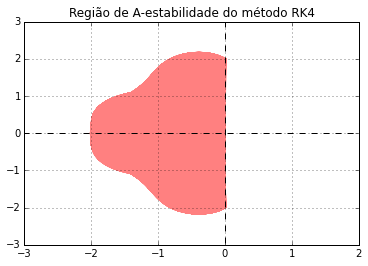

In [44]:
Path=mpath.Path
fig = plt.figure()
for name,z in zip(['RK4','teste'],[[1j,1-1j,1+1j],R]):
    fig.clf()
    ax=fig.add_subplot(111)

    verts=map(lambda z:(real(z),imag(z)), z)

    codes=[Path.MOVETO]+[Path.LINETO]*(len(verts)-2)+[Path.CLOSEPOLY]

    path=mpath.Path(verts,codes)
    patch=mpatches.PathPatch(path,facecolor=[1, 0.5, 0.5], edgecolor=[1, 0.5, 0.5],alpha=1)
    ax.add_patch(patch)
    ax.plot(M.real,M.imag/float(1.5), color=[1, 0.5, 0.5])
    ax.plot(M.real+2.0335,4*M.imag, color=[1, 1, 1])
    ax.plot([-6,4],[0,0],'--',color='black')  
    ax.plot([0,0],[-6,6],'--',color='black')
    ax.set_xlim(-3,2)
    ax.set_ylim(-3,3)
    plt.title(u'Região de A-estabilidade do método RK4')
plt.grid()


A área de estabilidade do método Taylor ordem 3 é maior que a do método Euler implícito (Backward Euler) e menor que a do método Euler explícito (Forward Euler)


####(c) Pode ser o método de Taylor de ordem m A-estável para algum valor de m?. Explique.

Seja $S$ a região de estabilidade do método talque: $S=\{h\lambda \in \mathbb{C}:|R(h\lambda)|\leq 1\}$, o método é chamado A-estável se $\{h\lambda \in \mathbb{C}:\Re(h\lambda)\leq 0\}$, ou seja, contém todo o semi-plano dos complexos tal que a parte Real é menor que zero. Onde $R(h\lambda)$ é o fator multiplicativo das equações "Stiff"

Para o método de Taylor, temos que:  
  
$R(h\lambda)=1+h\lambda +\frac{1}{2!}h^{2}\lambda^{2}+\frac{1}{3!}h^{3}\lambda^{3}...$  
$R(0)=1$  
  
Como tenhum polinômio (grau maior que zero) $R(h\lambda)$ é limitado a 1 para todo $\Re(h\lambda)\leq 0$, então não existe ordem $m$ que torne o método A-estável.

##5. Considere a equação diferencial teste x = f (t; x) e o método numérico para resolvê-la


$x_{n+1}={x_n}+h(\theta f(t_{n},x_{n})+(1-\theta)f(t_{n+1},x_{n+1}))$  
  
$\theta>0$

####(a) Determine um intervalo $[\alpha, \beta]$ tal que o método é estável para todo $\alpha\leq\theta\leq\beta$


Temos:  
  
$x_{n+1}=x_{n}+h(\theta\lambda x_{n}+(1-\theta)\lambda x_{n+1})\implies$  
$\implies x_{n+1}=x_{n}+h\theta\lambda x_{n} +h(1-\theta)\lambda x_{n+1}\implies$  
$\implies x_{n+1}[1+h(\theta-1)\lambda]=(1+h\theta\lambda)x_{n}\implies$  
$\implies x_{n+1}=\frac{(1+h\theta\lambda)}{[1+h(\theta-1)\lambda]}x_{n}$  
  
Para convergir:  
  
$\Big|\frac{(1+h\theta\lambda)}{[1+h(\theta-1)\lambda]}\Big|<1$  
  
Caso 1. 
  
$\frac{(1+h\theta\lambda)}{[1+h(\theta-1)\lambda]}<1\implies$  
$\implies1+h\theta\lambda<1+h(\theta-1)\lambda\implies$  
$\implies h\lambda<0$  
  
Caso 2.  
  
$\frac{-(1+h\theta\lambda)}{[1+h(\theta-1)\lambda]}<1\implies$  
$\implies-1-h\theta\lambda<1+h(\theta-1)\lambda\implies$  
$\implies-2-h\lambda<2h\theta\lambda\implies$  
$\implies\theta>\frac{-1}{h\lambda}+\frac{1}{2}$  
  
$\lim_{(h\lambda) \to -\infty} (\frac{-1}{h\lambda}+\frac{1}{2}) = \frac{1}{2}$  
  
$\lim_{(h\lambda) \to 0} (\frac{-1}{h\lambda}+\frac{1}{2}) = \infty$ 
  
portanto:  
  
$\frac{1}{2}<\theta$  
o intervalo $[\alpha, \beta]$ é $(\frac{1}{2},\infty)$

####(b) Descreva como você programaria (em pseudo-código) o esquema numérico acima.


Início  
 $\Big|$ Função $f^{*}(X,Y) = <>$   
 $\Big|$ Ler $X_0, Y_0$ (Cond. Iniciais)  
 $\Big|$ Ler $X_n$ (Abscissa do ponto desejado)  
 $\Big|$ Ler $N$ (Número de intervalos)  
 $\Big|$ $H\leftarrow \frac{(X_{n}-X_{0})}{N}$  
 $\Big|$ $X \leftarrow X_{0};$  $Y \leftarrow Y_{0};$  
 $\Big|$ Ler $\theta$  
 $\Big|$ Se $\theta>\frac{1}{2}$ executar:  
 $\Big|$ $\Big|$Para $i$ de $1$ até $N$ executar:   
 $\Big|$ $\Big|$ $\Big|$ $Y_{i+1} \leftarrow Y_{i}+ H*(\theta f(X_{i},Y_{i})+(1-\theta)f(X_{i+1},Y_{i+1}))$   
 $\Big|$ $\Big|$ $\Big|$ $X_{i+1} \leftarrow X_{i} +H$   
 $\Big|$ $\Big|$Fim($I$)  
 $\Big|$  Fim(Se)  
 $\Big|$ Escrever $X_n,Y$  
 Fim


####(c) Para qual valor do parametro $\theta$ pode se obter o método de Euler Forward, Euler Backward e o método do Trapézio?.

Euler Forward:  
  
$\frac{1+h\theta\lambda}{1+h(\theta-1)\lambda}=1+h\lambda \implies$  
$\implies 1+h\theta\lambda=(1+h\lambda)[1+h(\theta-1)\lambda]\implies$  
$\implies 1+h\theta\lambda=1+h(\theta-1)\lambda +h\lambda+h^{2}\lambda^{2}(\theta-1)\implies$  
$\implies 1+h\theta\lambda=1+h\theta\lambda-h\lambda +h\lambda+h^{2}\lambda^{2}\theta-h^{2}\lambda^{2}\implies$  
$\implies h^{2}\lambda^{2}(\theta-1)=0$  
  
Como $h\lambda\neq0$(ítem anterior), temos que:  
$\theta=1$  
  
Euler Backward:  
  
$\frac{1+h\theta\lambda}{1+h(\theta-1)\lambda} =\frac{1}{1+h\lambda}\implies$  
$\implies(1+h\theta\lambda)(1+h\lambda)=1+h(\theta-1)\lambda\implies$  
$\implies1+h\theta\lambda-h\lambda-h^{2}\lambda^{2}\theta=1+h\theta\lambda-h\lambda\implies$  
$-h^{2}\lambda^{2}\theta=0$  
  
Como $h\lambda\neq0$(ítem anterior), temos que:  
$\theta=0$  
  
Trapézio:  
  
$\frac{1+h\theta\lambda}{1+h(\theta-1)\lambda}=\frac{1+\frac{h\lambda}{2}}{1-\frac{h\lambda}{2}}$  
é imediato que:  
$\theta=\frac{1}{2}$

####(d) Como você modificaria o esquema para obter um método análogo ao método de Heun?

Definiria $\tilde{x}_{i+1}=x_{i}+hf(t_{i},x_{i})$, como no método de Heun;  
  
Escolheria $\theta = \frac{1}{2}$;  
  
Escreveria a equação do enunciado na forma:  
  
$x_{n+1}={x_n}+h(\theta f(t_{n},x_{n})+(1-\theta)f(t_{n+1},\tilde{x}_{n+1}))$  
  


O algoritmo ficara assim:  
  
Início  
 $\Big|$ Função $f^{*}(X,Y) = <>$  
 $\Big|$ Ler $X_0, Y_0$ (Cond. Iniciais)  
 $\Big|$ Ler $X_n$ (Abscissa do ponto desejado)  
 $\Big|$ Ler $N$ (Número de intervalos)  
 $\Big|$ $H\leftarrow \frac{(X_{n}-X_{0})}{N}$  
 $\Big|$ $X \leftarrow X_{0};$  $Y \leftarrow Y_{0};$  
 $\Big|$ $\theta=\frac{1}{2}$  
 $\Big|$ $\Big|$Para $I$ de $1$ até $N$ executar:  
 $\Big|$ $\Big|$ $\Big|$ $Y^{*} \leftarrow Y+ H*f^{*}(X,Y)$  
 $\Big|$ $\Big|$ $\Big|$ $Y \leftarrow Y+ H*(\theta f^{*}(X,Y)+(1-\theta)f^{*}(X+H,Y^{*}))$  
 $\Big|$ $\Big|$ $\Big|$ $X \leftarrow X +H$   
 $\Big|$ $\Big|$Fim($I$)  
 $\Big|$  Fim(Se)  
 $\Big|$ Escrever $X_n,Y$  
 Fim

####(e) Determine o ordem de convergência global para o método obtido em d):


$x_{n+1}={x_n}+h(\theta f(t_{n},x_{n})+(1-\theta)f(t_{n+1},\tilde{x}_{n+1}))$

Considere:  
  
$LTE$ = Erro local de truncamento do método;  
$e_{n} = |x_{n}-x(t_{n})|$ = Erro global  
  
$(i)$ $x_{n+1}=x_{n}+\frac{h}{2}[f(t_{n},x_{n})+f(t_{n+1},x_{n}+hf(t_{n},x_{n}))]+hLTE$  
  
O método exato:  
  
$(ii)$ $x(t_{n+1})=x(t_{n})+\frac{h}{2}[f(t_{n},x(t_{n}))+f(t_{n+1},x(t_{n})+hf(t_{n},x(t_{n})))]$  
  
$(i)-(ii)$  
  
$|x_{n+1}-x(t_{n+1})|=|x_{n}-x(t_{n})+\frac{h}{2}[f(t_{n},x_{n})-f(t_{n},x(t_{n}))+f(t_{n+1},x_{n}+hf(t_{n},x_{n}))-f(t_{n+1},x(t_{n})+hf(t_{n},x(t_{n})))]+hLTE|\leq$  
  
$\leq|x_{n}-x(t_{n})|+\frac{h}{2}(|[f(t_{n},x_{n})-f(t_{n},x(t_{n}))|)+\frac{h}{2}(|f(t_{n+1},x_{n}+hf(t_{n},x_{n}))-f(t_{n+1},x(t_{n})+hf(t_{n},x(t_{n})))|)+|hLTE|$  
  
Considerando $x$ Lipschitz contínua:  
  
$\leq|x_{n}-x(t_{n})|+\frac{h}{2}L|x_{n}-x(t_{n})|+\frac{h}{2}L|x_{n}+hf(t_{n},x_{n})-x(t_{n})+hf(t_{n},x(t_{n}))|+|hLTE|\leq$  
  
$\leq|x_{n}-x(t_{n})|+hL|x_{n}-x(t_{n})|+\frac{h^{2}}{2}L^{2}|x_{n}-x(t_{n})|+|hLTE|=$  
  
$=|x_{n}-x(t_{n})|(1+hL+\frac{h^{2}}{2}L^{2})$  
  
Portanto:
  
$e_{n+1}\leq e_{n}(1+hL+\frac{h^{2}}{2}L^{2})+|hLTE|$  
  
e assim:  
  
$e_{n+1}\leq (e_{n-1}(1+hL+\frac{h^{2}}{2}L^{2})+|hLTE|)(1+hL+\frac{h^{2}}{2}L^{2})+|hLTE| =$  
  
$=|e_{0}|(1+hL+\frac{h^{2}}{2}L^{2})^{n+1}+|hLTE|(1+(1+hL+\frac{h^{2}}{2}L^{2})+(1+hL+\frac{h^{2}}{2}L^{2})^{2}+...+(1+hL+\frac{h^{2}}{2}L^{2})^{n})=$  
  
$=|e_{0}|(1+hL+\frac{h^{2}}{2}L^{2})^{n+1}+|hLTE|\Bigg(\frac{\Big(1+hL+\frac{h^{2}}{2}L^{2}\Big)^{n+1}-1}{\Big(1+hL+\frac{h^{2}}{2}L^{2}\Big)-1}\Bigg)=$  
  
$=|e_{0}|(1+hL+\frac{h^{2}}{2}L^{2})^{n+1}+|hLTE|\Bigg(\frac{\Big(1+hL+\frac{h^{2}}{2}L^{2}\Big)^{n+1}-1}{\Big(hL+\frac{h^{2}}{2}L^{2}\Big)}\Bigg)$  
  
Portanto  
  
$e_{n}\leq O(h^{2})$  
  
e assim a ordem de convergência global é igual a 2